In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)
m = 100
x1 = 10 * np.random.rand(m,1) - 6 
y = 10 + 6 * x1 + 5 * x1**2 + 30 *np.random.randn(m,1)

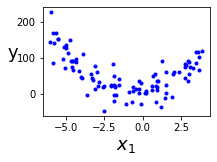

In [ ]:
plt.figure(figsize=(3,2))
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation = 0, fontsize=18)
plt.show()

In [ ]:
#資料前處理
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x1_p = poly.fit_transform(x1)

In [ ]:
x1[0], x1_p[0]

(array([-1.82977995]), array([-1.82977995,  3.34809468]))

In [ ]:
#Feature 標準化
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
x1_ps = scal.fit_transform(x1_p)

In [ ]:
#配適模型-LinearRegression

from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(x1_ps, y)

LinearRegression()

In [ ]:
poly_reg.intercept_, poly_reg.coef_

(array([55.51681743]), array([[17.42161695, 54.04329404]]))

In [ ]:
#配適模型-SGDRegressor

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(x1_ps, y.ravel())

SGDRegressor()

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([55.56352038]), array([16.94170371, 53.59058434]))

In [ ]:
x_new = [[-5],[1]]
x_new_p = poly.transform(x_new)
x_new_ps = scal.transform(x_new_p)

In [ ]:
poly_reg.predict(x_new_ps)

array([[113.63626971],
       [ 19.87706932]])

In [ ]:
sgd_reg.predict(x_new_ps)

array([113.6338666 ,  19.97941421])

In [ ]:
#使用pipeline

from sklearn.pipeline import Pipeline

In [ ]:
pip_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('poly_reg', LinearRegression())
])

In [ ]:
pip_reg.fit(x1,y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()), ('poly_reg', LinearRegression())])

In [ ]:
pip_reg['poly_reg'].intercept_, pip_reg['poly_reg'].coef_

(array([55.51681743]), array([[17.42161695, 54.04329404]]))

In [ ]:
x_new = [[-5],[1]]

pip_reg.predict(x_new)

array([[113.63626971],
       [ 19.87706932]])

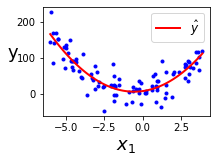

In [ ]:
plt.figure(figsize=(3,2))

x1s = np.linspace(x1.min(),x1.max(), 100).reshape(-1,1)
y_pred = pip_reg.predict(x1s)

plt.plot(x1, y, "b.")
plt.plot(x1s, y_pred, "r-", linewidth=2, label="$\hat y$")
         
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=12)

plt.show()